<a href="https://colab.research.google.com/github/Jwdegames/GasSensorMLTasks/blob/Joseph/gas_sensor_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://archive.ics.uci.edu/ml/datasets/Gas+sensor+array+temperature+modulation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
!ls "/content/drive/My Drive/STAT483/task1/GasSensorMLTasks/gas-sensor-array-temperature-modulation"

csv_file = "/content/drive/My Drive/STAT483/task1/GasSensorMLTasks/gas-sensor-array-temperature-modulation/20160930_203718.csv"

#diff_csv = "/content/drive/My Drive/STAT483/task1/GasSensorMLTasks/gas-sensor-array-temperature-modulation/20161001_231809.csv"

diff_csv = "/content/drive/My Drive/STAT483/task1/GasSensorMLTasks/gas-sensor-array-temperature-modulation/20161003_085624.csv"




20160930_203718.csv  20161006_182224.csv  20161013_143355.csv
20161001_231809.csv  20161007_210049.csv  20161014_184659.csv
20161003_085624.csv  20161008_234508.csv  20161016_053656.csv
20161004_104124.csv  20161010_095046.csv  README.txt
20161005_140846.csv  20161011_113032.csv


In [113]:

def import_data(data_source, col_names=None):
    return pd.read_csv(data_source, names=col_names)

def merge_datasets(filenames, columns = None):
  file0 = filenames.pop(0)
  merged_df = import_data(file0, columns)
  for file in filenames:
    curr_df = import_data(file, columns)
    merged_df.merge(curr_df)
  return merged_df



In [ ]:

filenames =
merged_df = merge_datasets()

In [109]:
#read the file of first measurement (performed at 2016-09-30) as a data frame:
#df = pd.read_csv('gas-sensor-array-temperature-modulation/20160930_203718.csv')
df = pd.read_csv(csv_file)
diff_df = pd.read_csv(diff_csv)

In [ ]:
#show the head of the data frame:
df.head(20)


,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445
5,1.544,0.0,55.8400,26.6200,240.8361,0.2020,60.1083,74.3444,81.5100,29.7970,72.9643,83.1477,80.5302,58.0412,39.2482,65.0981,67.8697,63.5316,50.3730,63.3641
6,1.854,0.0,55.8400,26.6200,240.7602,0.2010,64.1020,74.3444,76.4748,28.1797,72.4181,78.4368,79.0768,59.7614,40.4067,64.1416,61.6173,60.5007,50.6424,66.2847
7,2.163,0.0,55.8400,26.6200,240.6845,0.2009,62.6869,71.3877,73.8965,27.6523,64.4007,69.7912,72.5239,55.6363,39.6271,62.7987,65.8307,56.5195,50.3730,64.3090
8,2.472,0.0,55.8400,26.6200,240.6624,0.2009,54.8336,67.0368,69.2228,27.4429,64.9211,63.9055,63.5872,54.0730,40.5881,64.1416,63.9090,53.0811,48.9146,63.3641
9,2.781,0.0,55.8400,26.6200,240.6519,0.2003,51.2600,64.5303,61.4312,25.6881,54.7235,57.2118,59.6255,55.6363,40.9928,61.9071,60.3791,52.7888,48.3640,62.4461


In [ ]:
#show the details of the data frame
#(number and list of the columns names,data type of each column,...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295719 entries, 0 to 295718
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time (s)            295719 non-null  float64
 1   CO (ppm)            295719 non-null  float64
 2   Humidity (%r.h.)    295719 non-null  float64
 3   Temperature (C)     295719 non-null  float64
 4   Flow rate (mL/min)  295719 non-null  float64
 5   Heater voltage (V)  295719 non-null  float64
 6   R1 (MOhm)           295719 non-null  float64
 7   R2 (MOhm)           295719 non-null  float64
 8   R3 (MOhm)           295719 non-null  float64
 9   R4 (MOhm)           295719 non-null  float64
 10  R5 (MOhm)           295719 non-null  float64
 11  R6 (MOhm)           295719 non-null  float64
 12  R7 (MOhm)           295719 non-null  float64
 13  R8 (MOhm)           295719 non-null  float64
 14  R9 (MOhm)           295719 non-null  float64
 15  R10 (MOhm)          295719 non-nul

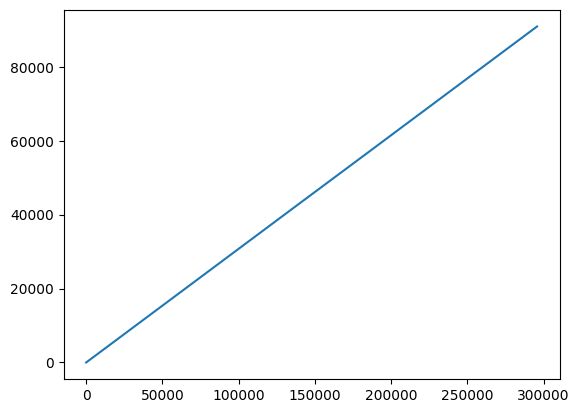

In [ ]:
plt.plot(df.loc[:,"Time (s)"])
#df.iloc[:,1]

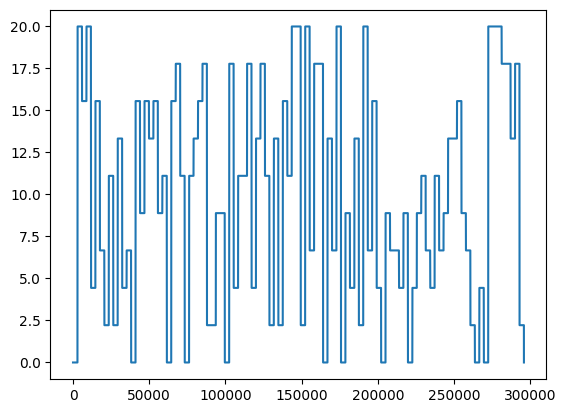

In [ ]:
plt.plot(df.loc[:,"CO (ppm)"])

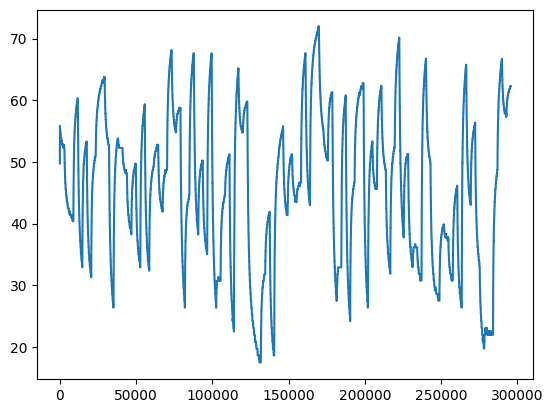

In [ ]:
plt.plot(df.loc[:,"Humidity (%r.h.)"])

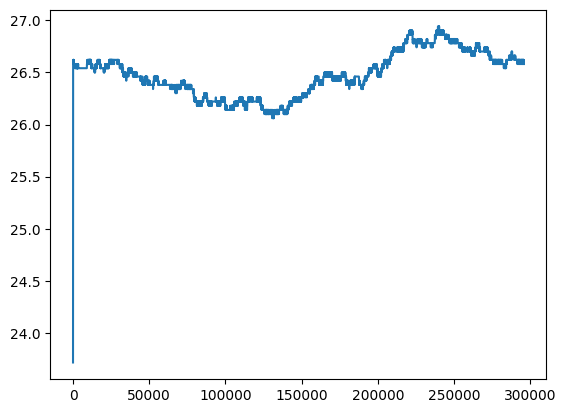

In [ ]:
plt.plot(df.loc[:,"Temperature (C)"])

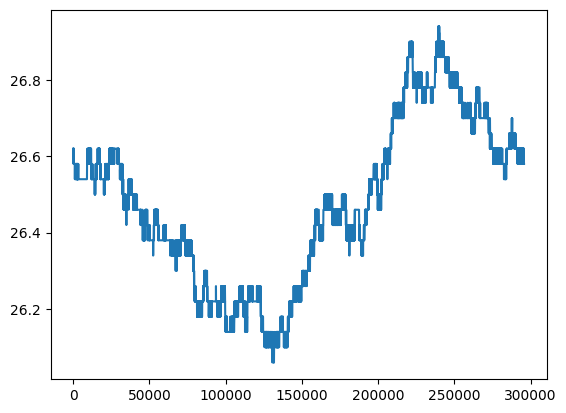

In [71]:
# Drop the first row of the dataset "df"

#the only out of range record (based on the temperature value is first record) which is removed
df_1 = df.drop(df.index[0])

plt.plot(df_1.loc[:,"Temperature (C)"])

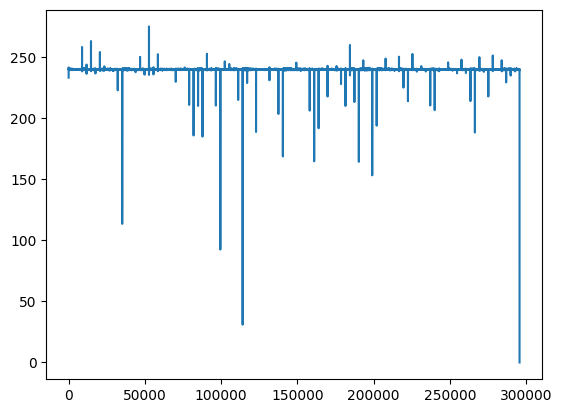

In [ ]:
plt.plot(df.loc[:,"Flow rate (mL/min)"])

(array([2.29454e+05, 1.31000e+02, 1.51000e+02, 1.20000e+02, 1.35000e+02,
        1.44000e+02, 1.62000e+02, 1.56000e+02, 1.48000e+02, 6.51180e+04]),
 array([0.199 , 0.2692, 0.3394, 0.4096, 0.4798, 0.55  , 0.6202, 0.6904,
        0.7606, 0.8308, 0.901 ]),
 <BarContainer object of 10 artists>)

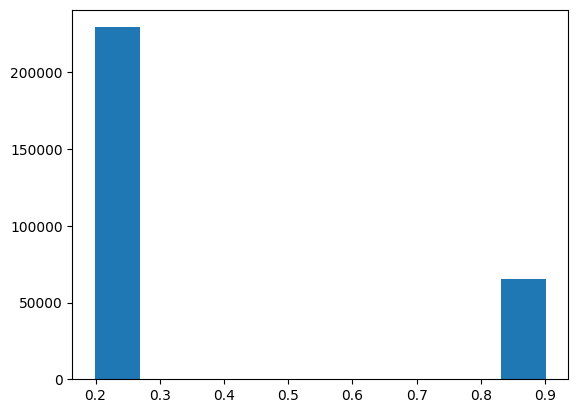

In [ ]:
plt.hist(df.loc[:,"Heater voltage (V)"])


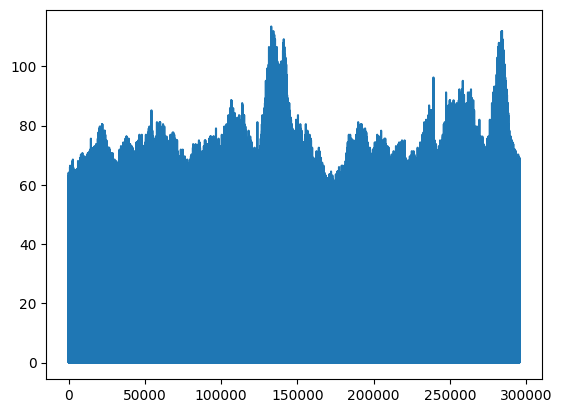

In [ ]:
plt.plot(df.loc[:,"R1 (MOhm)"])


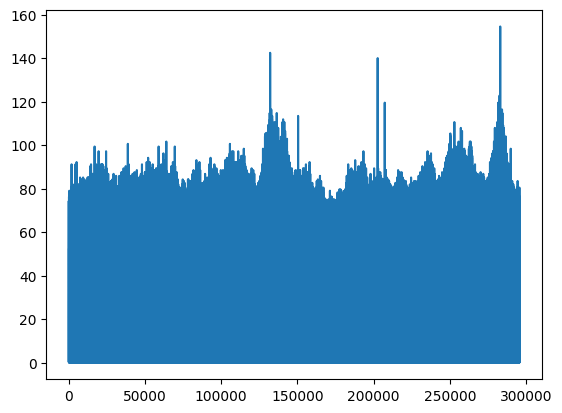

In [ ]:
plt.plot(df.loc[:,"R2 (MOhm)"])

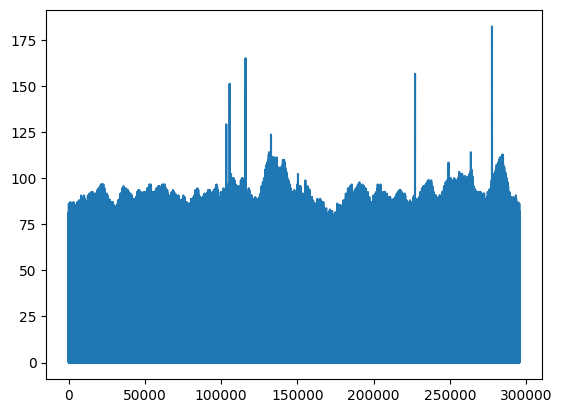

In [ ]:
plt.plot(df.loc[:,"R3 (MOhm)"])

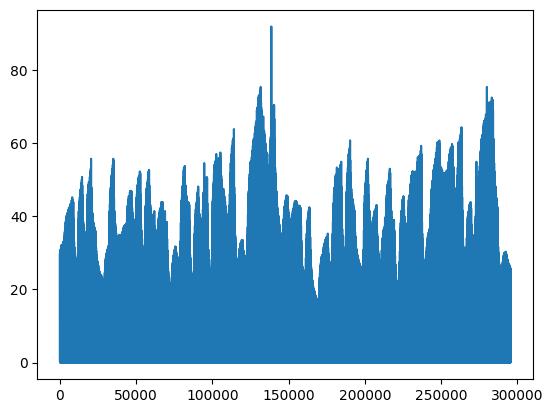

In [ ]:
plt.plot(df.loc[:,"R4 (MOhm)"])

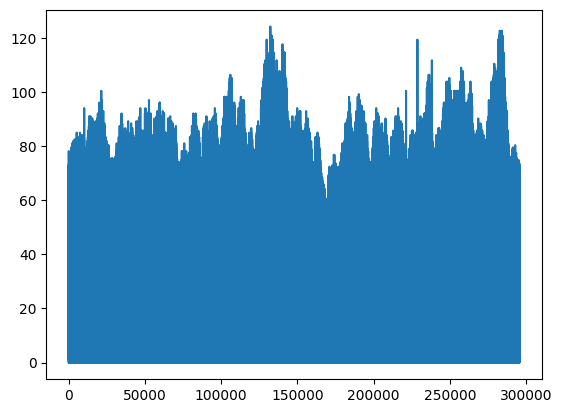

In [ ]:
plt.plot(df.loc[:,"R5 (MOhm)"])

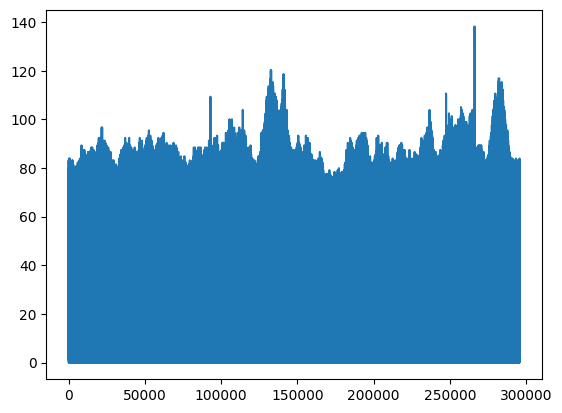

In [ ]:
plt.plot(df.loc[:,"R6 (MOhm)"])

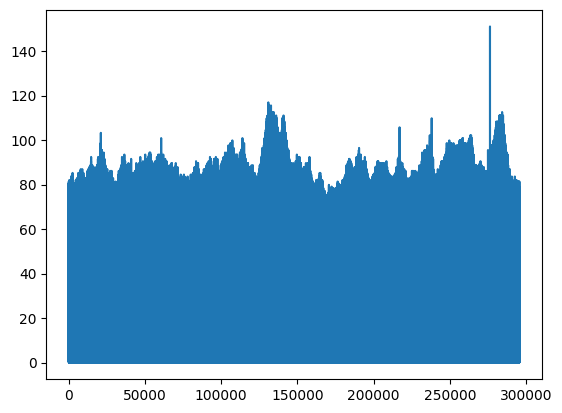

In [ ]:
plt.plot(df.loc[:,"R7 (MOhm)"])

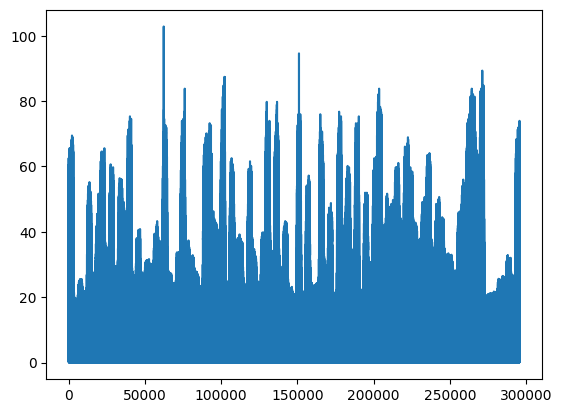

In [ ]:
plt.plot(df.loc[:,"R8 (MOhm)"])

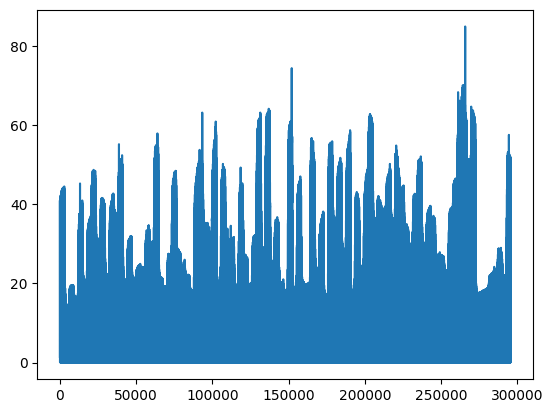

In [ ]:
plt.plot(df.loc[:,"R9 (MOhm)"])

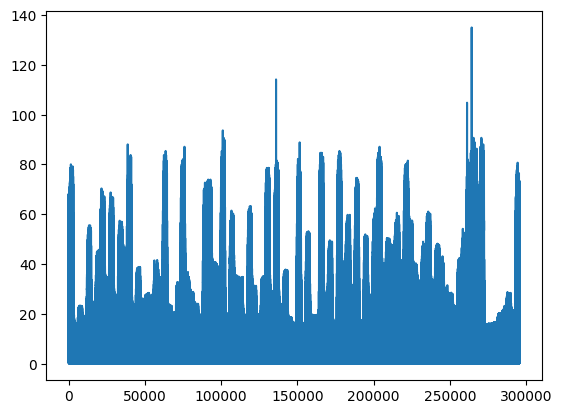

In [ ]:
plt.plot(df.loc[:,"R10 (MOhm)"])

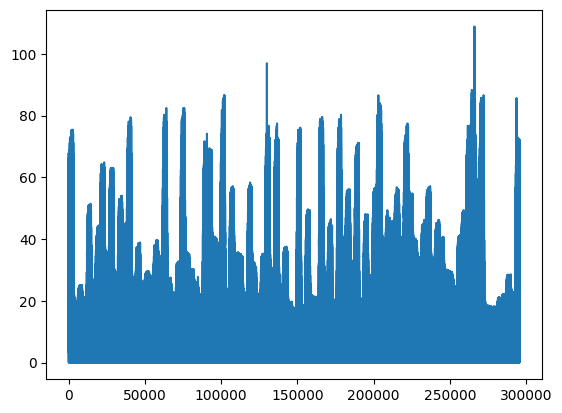

In [ ]:
plt.plot(df.loc[:,"R11 (MOhm)"])

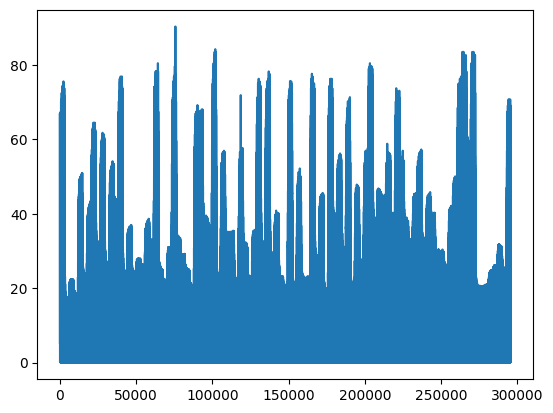

In [ ]:
plt.plot(df.loc[:,"R12 (MOhm)"])

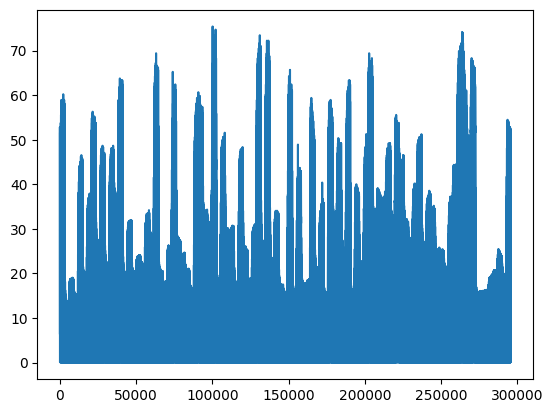

In [ ]:
plt.plot(df.loc[:,"R13 (MOhm)"])

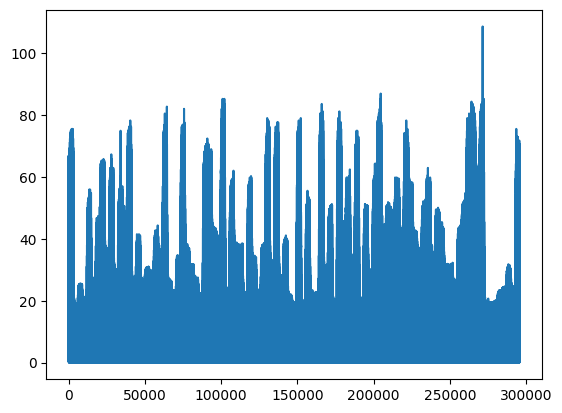

In [ ]:
plt.plot(df.loc[:,"R14 (MOhm)"])

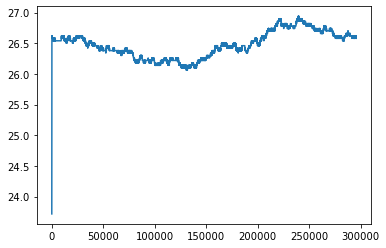

In [ ]:
#plt.plot(df.loc[:,"R4 (MOhm)"])

#plt.plot(df.loc[:,"Flow rate (mL/min)"])

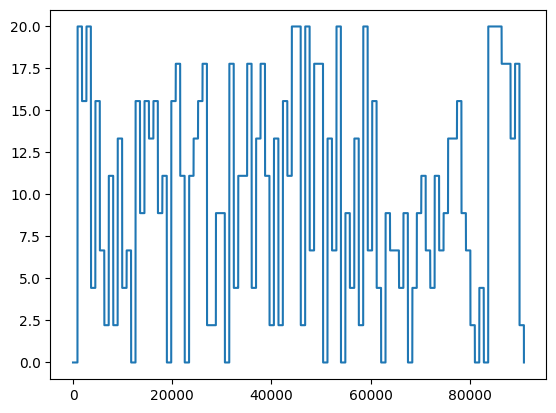

In [ ]:
#show the list of total null values in each column:
df.isnull().sum()
plt.plot(df["Time (s)"], df["CO (ppm)"])  #"CO (ppm)". "Humidity (%r.h.)"
# Multiple data points at t = 0, consider cutting it.

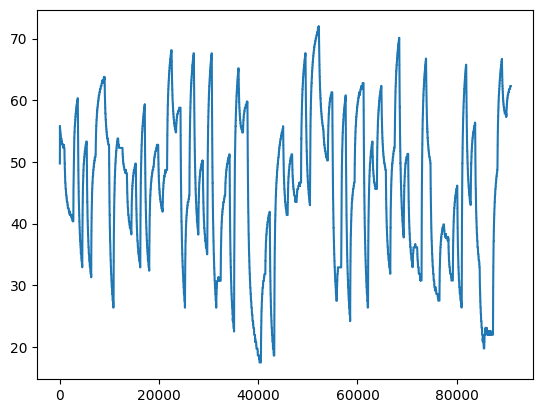

In [ ]:
plt.plot(df["Time (s)"], df["Humidity (%r.h.)"])

In [ ]:
#the main goal of the project is to predict the temperature of a given gas sensor array
#based on the meseaured features (resistance,voltage of each sensor in the array,
#flow rate, CO and humidity rate)
#The temperature column is the prediction object which will be used for classification
#the value of this column should be classified to few classes.

In [22]:
# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#as the randomness is used in the construction of the model (XGBoost is an ensemble and works
#based on trees), cross validation is used to repeat the learning and fiting procedure.
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

## Decision Tree

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score





In [103]:
#define object and featues in the data frame:
X = df.drop(['Time (s)','Humidity (%r.h.)','CO (ppm)','R2 (MOhm)','R3 (MOhm)','R6 (MOhm)','R7 (MOhm)','R9 (MOhm)','R10 (MOhm)',
            'R11 (MOhm)'],axis=1)
y_humid = df[['Humidity (%r.h.)']]
y_co = df[['CO (ppm)']]
y = df[['Humidity (%r.h.)','CO (ppm)']]


#split data into train and test sets: CO
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(X, y_co, test_size=0.2, random_state=42)
#split data into train and test sets: Humidity
X_train_humid, X_test_humid, y_train_humid, y_test_humid = train_test_split(X, y_humid, test_size=0.2, random_state=42)
#split data into train and test sets: Both
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:


## WITH DIFFERENT DATASET

diff_X = diff_df.drop(['Time (s)','Humidity (%r.h.)','CO (ppm)','R2 (MOhm)','R3 (MOhm)','R6 (MOhm)','R7 (MOhm)','R9 (MOhm)','R10 (MOhm)',
            'R11 (MOhm)'],axis=1)
diff_y_humid = diff_df[['Humidity (%r.h.)']]
diff_y_co = diff_df[['CO (ppm)']]
diff_y = diff_df[['Humidity (%r.h.)','CO (ppm)']]


#split data into train and test sets: CO
diff_X_train_co, diff_X_test_co, diff_y_train_co, diff_y_test_co = train_test_split(diff_X, diff_y_co, test_size=0.2, random_state=42)
#split data into train and test sets: Humidity
diff_X_train_humid, diff_X_test_humid, diff_y_train_humid, diff_y_test_humid = train_test_split(diff_X, diff_y_humid, test_size=0.2, random_state=42)
#split data into train and test sets: Both
diff_X_train, diff_X_test, diff_y_train, diff_y_test = train_test_split(diff_X, diff_y, test_size=0.2, random_state=42)

In [12]:
# Decision tree regressor
# CO only model

dt_regressor_co = DecisionTreeRegressor(random_state=42)
dt_reg_co_fit = dt_regressor_co.fit(X_train_co, y_train_co)

In [13]:
# Decision tree regressor
# Humidity only model

dt_regressor_humid = DecisionTreeRegressor(random_state=42)
dt_reg_humid_fit = dt_regressor_humid.fit(X_train_humid, y_train_humid)

In [14]:
# Decision tree regressor
# CO and Humidity combined model

dt_regressor_all = DecisionTreeRegressor(random_state=42)
dt_reg_all_fit = dt_regressor_all.fit(X_train, y_train)

In [53]:
# Use the tree's predict method on the test data
# CO only model

dt_predictions_co = dt_regressor_co.predict(X_test_co)

# Calculate Mean Squared Error (MSE)
dt_mse_co = mean_squared_error(y_test_co, dt_predictions_co)

# Calculate Mean Absolute Error (MAE)
dt_mae_co = mean_absolute_error(y_test_co, dt_predictions_co)

# Calculate R2 score
dt_r2_co = r2_score(y_test_co, dt_predictions_co)

# Print the MSE and MAE values
print(f"Mean Squared Error (MSE): {dt_mse_co}")
print(f"Mean Absolute Error (MAE): {dt_mae_co}")
print(f"R-squared (R2): {dt_r2_co}")

Mean Squared Error (MSE): 5.328285695180745
Mean Absolute Error (MAE): 0.6988413178006277
R-squared (R2): 0.8710182252603696


In [54]:
# Use the tree's predict method on the test data
# Humidity only model

dt_predictions_humid = dt_regressor_humid.predict(X_test_humid)

# Calculate Mean Squared Error (MSE)
dt_mse_humid = mean_squared_error(y_test_co, dt_predictions_humid)

# Calculate Mean Absolute Error (MAE)
dt_mae_humid = mean_absolute_error(y_test_co, dt_predictions_humid)

# Calculate R2 score
dt_r2_humid = r2_score(y_test_humid, dt_predictions_humid)

# Print the MSE and MAE values
print(f"Mean Squared Error (MSE): {dt_mse_humid}")
print(f"Mean Absolute Error (MAE): {dt_mae_humid}")
print(f"R-squared (R2): {dt_r2_humid}")

Mean Squared Error (MSE): 1511.905391766056
Mean Absolute Error (MAE): 36.0946073752198
R-squared (R2): 0.8680458317438555


In [55]:
# Use the tree's predict method on the test data
# CO and Humidity combined model

dt_predictions_all = dt_regressor_all.predict(X_test)

# Calculate Mean Squared Error (MSE)
dt_mse_all = mean_squared_error(y_test, dt_predictions_all)

# Calculate Mean Absolute Error (MAE)
dt_mae_all = mean_absolute_error(y_test, dt_predictions_all)

# Calculate R2 score
dt_r2_all = r2_score(y_test, dt_predictions_all)

# Print the MSE and MAE values
print(f"Mean Squared Error (MSE): {dt_mse_all}")
print(f"Mean Absolute Error (MAE): {dt_mae_all}")
print(f"R-squared (R2): {dt_r2_all}")

Mean Squared Error (MSE): 13.079484418483382
Mean Absolute Error (MAE): 1.414930134079519
R-squared (R2): 0.8580449554961114


## ====
## Random Forest

In [46]:
from sklearn.multioutput import MultiOutputRegressor

In [33]:
# Random Forest regressor
# CO only model

rf_regressor_co = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_co_fit = rf_regressor_co.fit(X_train_co, y_train_co)

<ipython-input-33-09bab5ac2cf3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_co_fit = rf_regressor_co.fit(X_train_co, y_train_co)


In [34]:
# Random Forest regressor
# Humidity only model

rf_regressor_humid = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_humid_fit = rf_regressor_humid.fit(X_train_humid, y_train_humid)

<ipython-input-34-283f4cd363c0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_humid_fit = rf_regressor_humid.fit(X_train_humid, y_train_humid)


In [35]:
# Random Forest regressor
# CO and Humidity combined model

rf_regressor_all = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a MultiOutput Regressor
multioutput_rf_regressor_all = MultiOutputRegressor(rf_regressor_all)
multioutput_rf_regressor_all_fit = multioutput_rf_regressor_all.fit(X_train, y_train)


In [47]:
# Create a MultiOutput Regressor
multioutput_rf_regressor_all = MultiOutputRegressor(rf_regressor_all)
multioutput_rf_regressor_all_fit = multioutput_rf_regressor_all.fit(X_train, y_train)


In [56]:
# Use the random forest's predict method on the test data
# CO only model

rf_predictions_co = rf_regressor_co.predict(X_test_co)


# Calculate Mean Squared Error (MSE)
rf_mse_co = mean_squared_error(y_test_co, rf_predictions_co)

# Calculate Mean Absolute Error (MAE)
rf_mae_co = mean_absolute_error(y_test_co, rf_predictions_co)

# Calculate R2 score
rf_r2_co = r2_score(y_test_co, rf_predictions_co)

# Print the MSE and MAE values
print(f"Mean Squared Error (MSE): {rf_mse_co}")
print(f"Mean Absolute Error (MAE): {rf_mae_co}")
print(f"R-squared (R2): {rf_r2_co}")

Mean Squared Error (MSE): 2.658035912926032
Mean Absolute Error (MAE): 0.6546270218449903
R-squared (R2): 0.9356569431551017


In [57]:
# Use the random forest's predict method on the test data
# Humidity only model

rf_predictions_humid = rf_regressor_humid.predict(X_test_humid)


# Calculate Mean Squared Error (MSE)
rf_mse_humid = mean_squared_error(y_test_humid, rf_predictions_humid)

# Calculate Mean Absolute Error (MAE)
rf_mae_humid = mean_absolute_error(y_test_humid, rf_predictions_humid)

# Calculate R2 score
rf_r2_humid = r2_score(y_test_humid, rf_predictions_humid)

# Print the MSE and MAE values
print(f"Mean Squared Error (MSE): {rf_mse_humid}")
print(f"Mean Absolute Error (MAE): {rf_mae_humid}")
print(f"R-squared (R2): {rf_r2_humid}")

Mean Squared Error (MSE): 9.286126882693246
Mean Absolute Error (MAE): 1.6655946477072896
R-squared (R2): 0.9387118539658095


In [58]:
# Use the random forest's predict method on the test data
# CO and Humidity combined model

multi_rf_predictions_all = multioutput_rf_regressor_all.predict(X_test)



# Calculate Mean Squared Error (MSE)
rf_mse_all = mean_squared_error(y_test, multi_rf_predictions_all)

# Calculate Mean Absolute Error (MAE)
rf_mae_all = mean_absolute_error(y_test, multi_rf_predictions_all)

# Calculate R2 score
rf_r2_all = r2_score(y_test, multi_rf_predictions_all)

# Print the MSE and MAE values
print(f"Mean Squared Error (MSE): {rf_mse_all}")
print(f"Mean Absolute Error (MAE): {rf_mae_all}")
print(f"R-squared (R2): {rf_r2_all}")

Mean Squared Error (MSE): 5.972081397809639
Mean Absolute Error (MAE): 1.16011083477614
R-squared (R2): 0.9371843985604555


### With different dataset

In [92]:
## WITH DIFFERENT DATASET

# Use the random forest's predict method on the test data
# CO only model

diff_rf_predictions_co = rf_regressor_co.predict(diff_X_test_co)


# Calculate Mean Squared Error (MSE)
diff_rf_mse_co = mean_squared_error(diff_y_test_co, diff_rf_predictions_co)

# Calculate Mean Absolute Error (MAE)
diff_rf_mae_co = mean_absolute_error(diff_y_test_co, diff_rf_predictions_co)

# Calculate R2 score
diff_rf_r2_co = r2_score(diff_y_test_co, diff_rf_predictions_co)

# Print the MSE and MAE values
print(f"Mean Squared Error (MSE): {diff_rf_mse_co}")
print(f"Mean Absolute Error (MAE): {diff_rf_mae_co}")
print(f"R-squared (R2): {diff_rf_r2_co}")


Mean Squared Error (MSE): 6.8785928684357325
Mean Absolute Error (MAE): 1.7079905800473476
R-squared (R2): 0.8333909543300382


In [93]:
# Use the random forest's predict method on the test data
# Humidity only model

diff_rf_predictions_humid = rf_regressor_humid.predict(diff_X_test_humid)


# Calculate Mean Squared Error (MSE)
diff_rf_mse_humid = mean_squared_error(diff_y_test_humid, diff_rf_predictions_humid)

# Calculate Mean Absolute Error (MAE)
diff_rf_mae_humid = mean_absolute_error(diff_y_test_humid, diff_rf_predictions_humid)

# Calculate R2 score
diff_rf_r2_humid = r2_score(diff_y_test_humid, diff_rf_predictions_humid)

# Print the MSE and MAE values
print(f"Mean Squared Error (MSE): {diff_rf_mse_humid}")
print(f"Mean Absolute Error (MAE): {diff_rf_mae_humid}")
print(f"R-squared (R2): {diff_rf_r2_humid}")

Mean Squared Error (MSE): 162.4771658513466
Mean Absolute Error (MAE): 9.05628339572202
R-squared (R2): -0.05118398646125599


In [112]:
# Use the random forest's predict method on the test data
# CO and Humidity combined model

diff_multi_rf_predictions_all = multioutput_rf_regressor_all.predict(diff_X_test)



# Calculate Mean Squared Error (MSE)
diff_rf_mse_all = mean_squared_error(diff_y_test, diff_multi_rf_predictions_all)

# Calculate Mean Absolute Error (MAE)
diff_rf_mae_all = mean_absolute_error(diff_y_test, diff_multi_rf_predictions_all)

# Calculate R2 score
diff_rf_r2_all = r2_score(diff_y_test, diff_multi_rf_predictions_all)

# Print the MSE and MAE values
print(f"Mean Squared Error (MSE): {diff_rf_mse_all}")
print(f"Mean Absolute Error (MAE): {diff_rf_mae_all}")
print(f"R-squared (R2): {diff_rf_r2_all}")

Mean Squared Error (MSE): 84.67787935989116
Mean Absolute Error (MAE): 5.382136987884683
R-squared (R2): 0.3911034839343911


In [111]:

# Decision Tree model

# Use the random forest's predict method on the test data
# CO and Humidity combined model

dt_predictions_all = dt_regressor_all.predict(diff_X_test)



# Calculate Mean Squared Error (MSE)
diff_dt_mse_all = mean_squared_error(diff_y_test, dt_predictions_all)

# Calculate Mean Absolute Error (MAE)
diff_dt_mae_all = mean_absolute_error(diff_y_test, dt_predictions_all)

# Calculate R2 score
diff_dt_r2_all = r2_score(diff_y_test, dt_predictions_all)

# Print the MSE and MAE values
print(f"Mean Squared Error (MSE): {diff_dt_mse_all}")
print(f"Mean Absolute Error (MAE): {diff_dt_mae_all}")
print(f"R-squared (R2): {diff_dt_r2_all}")




Mean Squared Error (MSE): 127.53538558540093
Mean Absolute Error (MAE): 7.212706644403654
R-squared (R2): -0.06879131652959747


##====
## Save the model into files

In [51]:
import joblib
from google.colab import files


# Save the model to a file

model_dt_regressor_co = 'dt_regressor_co.pkl'
model_dt_regressor_humid = 'dt_regressor_humid.pkl'
model_dt_regressor_all = 'dt_regressor_all.pkl'
model_rf_regressor_co = 'rf_regressor_co.pkl'
model_rf_regressor_humid = 'rf_regressor_humid.pkl'
model_rf_regressor_all = 'rf_regressor_all.pkl'
model_multioutput_rf_regressor_all = 'multioutput_rf_regressor_all.pkl'

joblib.dump(dt_regressor_co, model_dt_regressor_co)
joblib.dump(dt_regressor_humid, model_dt_regressor_humid)
joblib.dump(dt_regressor_all, model_dt_regressor_all)
joblib.dump(rf_regressor_co, model_rf_regressor_co)
joblib.dump(rf_regressor_humid, model_rf_regressor_humid)
joblib.dump(rf_regressor_all, model_rf_regressor_all)
joblib.dump(multioutput_rf_regressor_all, model_multioutput_rf_regressor_all)


# Download the model file to your local machine
files.download(model_dt_regressor_co)
files.download(model_dt_regressor_humid)
files.download(model_dt_regressor_all)
files.download(model_rf_regressor_co)
files.download(model_rf_regressor_humid)
files.download(model_rf_regressor_all)
files.download(model_multioutput_rf_regressor_all)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##===

##Find the important variables

In [65]:
# CO only decision tree model

# Access feature importances
dt_co_importances = dt_regressor_co.feature_importances_

# Print feature importances
for feature_name, importance in zip(X.columns, dt_co_importances):
    print(f"{feature_name}: {importance}")

Temperature (C): 0.025639642191476318
Flow rate (mL/min): 0.016882278604698212
Heater voltage (V): 0.06839834129868194
R1 (MOhm): 0.058125133107241406
R4 (MOhm): 0.02725243912929648
R5 (MOhm): 0.013874307577431414
R8 (MOhm): 0.03828275208357651
R12 (MOhm): 0.150258556769169
R13 (MOhm): 0.5050655808314206
R14 (MOhm): 0.09622096840700799


In [66]:
# Humidity only decision tree model

# Access feature importances
dt_humid_importances = dt_regressor_humid.feature_importances_

# Print feature importances
for feature_name, importance in zip(X.columns, dt_humid_importances):
    print(f"{feature_name}: {importance}")

Temperature (C): 0.20402326499446982
Flow rate (mL/min): 0.010825679598765457
Heater voltage (V): 0.012740826521341744
R1 (MOhm): 0.12933446480834235
R4 (MOhm): 0.36751904932038465
R5 (MOhm): 0.08077974306410755
R8 (MOhm): 0.04725075636850696
R12 (MOhm): 0.0456863035758154
R13 (MOhm): 0.0387868170782898
R14 (MOhm): 0.06305309466997633


In [67]:
# CO and Humidity combined decision tree model

# Access feature importances
dt_all_importances = dt_regressor_all.feature_importances_

# Print feature importances
for feature_name, importance in zip(X.columns, dt_all_importances):
    print(f"{feature_name}: {importance}")

Temperature (C): 0.22746626464513026
Flow rate (mL/min): 0.013018916265672293
Heater voltage (V): 0.01407466635396438
R1 (MOhm): 0.09847200500341255
R4 (MOhm): 0.26869086803780884
R5 (MOhm): 0.050789622136475816
R8 (MOhm): 0.039865125617057844
R12 (MOhm): 0.12052237655877696
R13 (MOhm): 0.09240792042651481
R14 (MOhm): 0.07469223495518623


### Random Forest important variable

In [68]:
# CO only Random Forest

# Access feature importances
rf_co_importances = rf_regressor_co.feature_importances_

# Print feature importances
for feature_name, importance in zip(X.columns, rf_co_importances):
    print(f"{feature_name}: {importance}")

Temperature (C): 0.024883721435554437
Flow rate (mL/min): 0.017189190883776587
Heater voltage (V): 0.05875888448874971
R1 (MOhm): 0.05957537890165182
R4 (MOhm): 0.02951611809847723
R5 (MOhm): 0.014968952682042265
R8 (MOhm): 0.04384117144700612
R12 (MOhm): 0.15421305254089734
R13 (MOhm): 0.5115161672908869
R14 (MOhm): 0.0855373622309577


In [69]:
# Humidity only Random Forest

# Access feature importances
rf_humid_importances = rf_regressor_humid.feature_importances_

# Print feature importances
for feature_name, importance in zip(X.columns, rf_humid_importances):
    print(f"{feature_name}: {importance}")

Temperature (C): 0.21122377210536084
Flow rate (mL/min): 0.012952531340601415
Heater voltage (V): 0.011917026096957977
R1 (MOhm): 0.12453622460090588
R4 (MOhm): 0.3600203757866217
R5 (MOhm): 0.08009901842379478
R8 (MOhm): 0.049242923244340785
R12 (MOhm): 0.04370198023398025
R13 (MOhm): 0.03872856603380234
R14 (MOhm): 0.06757758213363388


In [70]:
multi_rf_all_importances = multioutput_rf_regressor_all.estimators_[0].feature_importances_

# Print feature importances for the first output
for feature_name, importance in zip(X.columns, multi_rf_all_importances):
    print(f"{feature_name}: {importance}")

Temperature (C): 0.21122377210536084
Flow rate (mL/min): 0.012952531340601415
Heater voltage (V): 0.011917026096957977
R1 (MOhm): 0.12453622460090588
R4 (MOhm): 0.3600203757866217
R5 (MOhm): 0.08009901842379478
R8 (MOhm): 0.049242923244340785
R12 (MOhm): 0.04370198023398025
R13 (MOhm): 0.03872856603380234
R14 (MOhm): 0.06757758213363388


## =====

In [ ]:
# Decision tree regressor

dt_regressor_humid = RandomForestRegressor(n_estimators=100, random_state=0)
dt_reg_humid_fit = dt_regressor_humid.fit(X_train_co, y_train_co)

In [ ]:
# Use the tree's predict method on the test data
dt_predictions_humid = dt_regressor_humid.predict(X_train_humid)

# Calculate the absolute errors
dt_errors_humid = abs(dt_predictions_humid - y_test_humid)
dt_mse_humid = mean_squared_error(dt_predictions_humid, y_test_humid)

print("MSE: ",dt_mse_humid)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(dt_errors_humid), 2), 'degrees.')

In [ ]:
## MULTIPLE

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Create a single model for multi-output regression
model = MultiOutputRegressor(RandomForestRegressor())



In [ ]:
# This is decision tree method with CO


X = df_1.drop("CO (ppm)",axis=1).values
y = df_1["CO (ppm)"].values

#split data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)  # X_test should contain your test data

# 'predictions' will contain predicted values for both humidity and CO levels

ValueError: ignored

In [ ]:
# ++++++++++++++++++++s

In [ ]:
#

In [ ]:
# This is for random forest to predict CO only


#define object and featues in the data frame:
X = df_1.drop("CO (ppm)",axis=1).values
y = df_1["CO (ppm)"].values

#split data into train and test sets:
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_regressor_co = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg_co_fit = rf_regressor_co.fit(X_train_co, y_train_co)


In [ ]:

# Use the random forest's predict method on the test data
predictions_co = rf_regressor_co.predict(X_train_co)

# Calculate the absolute errors
rf_errors_co = abs(predictions_co - y_test_co)
rf_mse_co = mean_squared_error(predictions_co, y_test_co)

print("MSE: ",rf_mse_co)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rf_errors_co), 2), 'degrees.')

0.8980987096770672
Mean Absolute Error: 0.29 degrees.


In [ ]:
features_name = df_1.drop("CO (ppm)",axis=1).columns.tolist()
print(features_name)

['Time (s)', 'Humidity (%r.h.)', 'Temperature (C)', 'Flow rate (mL/min)', 'Heater voltage (V)', 'R1 (MOhm)', 'R2 (MOhm)', 'R3 (MOhm)', 'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)', 'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)']


In [ ]:
#define object and featues in the data frame:
X_humid = df_2.drop("Humidity (%r.h.)",axis=1).values
y_humid = df_2["Humidity (%r.h.)"].values

#split data into train and test sets:
X_train_humid, X_test_humid, y_train_humid, y_test_humid = train_test_split(X_humid, y_humid, test_size=0.2, random_state=42)

In [ ]:
rf_regressor_humid = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg_hum_fit = rf_regressor_humid.fit(X_train_humid, y_train_humid)

In [ ]:
# Use the forest's predict method on the test data
predictions_humid = rf_regressor_humid.predict(X_test_humid)

# Calculate the absolute errors
rf_errors_humid = abs(predictions_humid - y_test_humid)
rf_mse_humid = mean_squared_error(predictions_humid, y_test_humid)

# Print out the mean absolute error (mae)
print("MSE: ", rf_mse_humid)
print('Mean Absolute Error:', round(np.mean(rf_errors_humid), 2), 'degrees.')

MSE:  0.5666664902060612
Mean Absolute Error: 0.26 degrees.


##Visualization

AttributeError: ignored

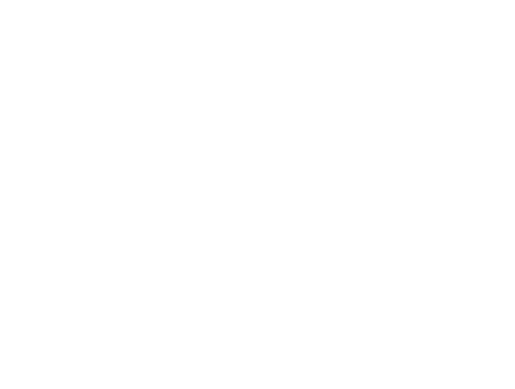

In [ ]:
from sklearn import tree
tree.plot_tree(rf_reg_co_fit)
tree.plot_tree(rf_reg_hum_fit)

In [ ]:
from sklearn.tree import export_graphviz


estimator_co = rf_regressor.estimators_[5]
estimator_humid = rf_regressor_humid.estimators_[5]


# Export as dot file
export_graphviz(estimator_co, out_file='tree_CO.dot',
                feature_names = estimator_co.feature_names,
                class_names = estimator_co.target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_CO.dot', '-o', 'tree_CO.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_CO.png')

AttributeError: ignored

#=========================

In [ ]:
import graphviz
from sklearn import tree

#print("The average absolute error for the first decision tree is", decisionTrees[2][0])
#print("The estimated hirability scores on the test data are", list(decisionTrees[5][0]))

features_name = df_1.drop("CO (ppm)",axis=1).columns.tolist()
print(features_name)

response_name =

dot_data = tree.export_graphviz(decisionTrees[0][0], out_file=None,
                      feature_names=col_names[1:-1],
                      class_names=["3", "4", "5"],
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
#get the list of the values of s specific column of the data frame:
df['Temperature (C)']

0         23.7184
1         26.6200
2         26.6200
3         26.6200
4         26.6200
           ...   
295714    26.5800
295715    26.5800
295716    26.5800
295717    26.5800
295718    26.5800
Name: Temperature (C), Length: 295719, dtype: float64

In [ ]:
#get the list of unique values of specific column of the data frame:
df["Temperature (C)"].unique()

array([23.7184, 26.62  , 26.6196, ..., 26.6172, 26.5969, 26.5846])

In [ ]:
#get number of unique values of specific column of the data frame:
df["Temperature (C)"].nunique()

5625

In [ ]:
#get the maximum and minimum value of the values of a specific column of the data frame:
T_max = df["Temperature (C)"].max()
T_min = df["Temperature (C)"].min()
T_avg = round(df["Temperature (C)"].mean(),2)

In [ ]:
print('T_max:',T_max)
print('T_min:',T_min)
print('T_avg:',T_avg)

T_max: 26.94
T_min: 23.7184
T_avg: 26.48


In [ ]:
#get the total number of the records those have a specific value in the defined column:
N_max = (df["Temperature (C)"]==26.94).sum()
N_min = (df["Temperature (C)"]==23.7184).sum()
N_avg = (df["Temperature (C)"]==26.48).sum()

In [ ]:
print('N_max:',N_max)
print('N_min:',N_min)
print('N_avg:',N_avg)

N_max: 175
N_min: 1
N_avg: 1


In [ ]:
#method2 to get the number of records (gas sensor arrays) those have the specific temperature
#(here maximum temerature value)
#the comination of two steps above which gives the same results as two seperate steps
N_max_m2 = (df["Temperature (C)"]==(df["Temperature (C)"].max())).sum()
N_min_m2 = (df["Temperature (C)"]==(df["Temperature (C)"].min())).sum()
N_avg_m2 = (df["Temperature (C)"]==(df["Temperature (C)"].mean())).sum()

In [ ]:
print('N_max:',N_max_m2)
print('N_min:',N_min_m2)
print('N_avg:',N_avg_m2)

N_max: 175
N_min: 1
N_avg: 0


In [ ]:
#method3 to get the number of records (gas sensor arrays) those have the specific temperature
#(here maximum temerature value)
#N_max_m3 = (lambda x:x.value_counts(ascending=True))(df["Temperature (C)"]==26.30)
N_max_m3 = (lambda x:x.value_counts(ascending=True))(df["Temperature (C)"]==(df["Temperature (C)"].max()))
N_min_m3 = (lambda x:x.value_counts(ascending=True))(df["Temperature (C)"]==(df["Temperature (C)"].min()))
N_avg_m3 = (lambda x:x.value_counts(ascending=True))(df["Temperature (C)"]==(df["Temperature (C)"].mean()))

In [ ]:
print('N_max:',N_max_m3)
print('N_min:',N_min_m3)
print('N_avg:',N_avg_m3)

N_max: True        175
False    295544
Name: Temperature (C), dtype: int64
N_min: True          1
False    295718
Name: Temperature (C), dtype: int64
N_avg: False    295719
Name: Temperature (C), dtype: int64


In [ ]:
#get the total number of the records those have a specific value in the defined column:
N_max = (df["Temperature (C)"]=="MAX").sum()
N_min = (df["Temperature (C)"]=="MIN").sum()
N_avg = (df["Temperature (C)"]=="AVG").sum()

In [ ]:
print('N_max:',N_max)
print('N_min:',N_min)
print('N_avg:',N_avg)

N_max: 0
N_min: 0
N_avg: 0


In [ ]:
#there are a lot of (5625) unique temerature value (within 295718 records)
#the range of temperature is limited between 23.7184 and 26.94.
#the average value 26.48 shows that the temperature data is mainly distributed
#to check that tempwearture data is useful:

<AxesSubplot:xlabel='Temperature (C)', ylabel='count'>

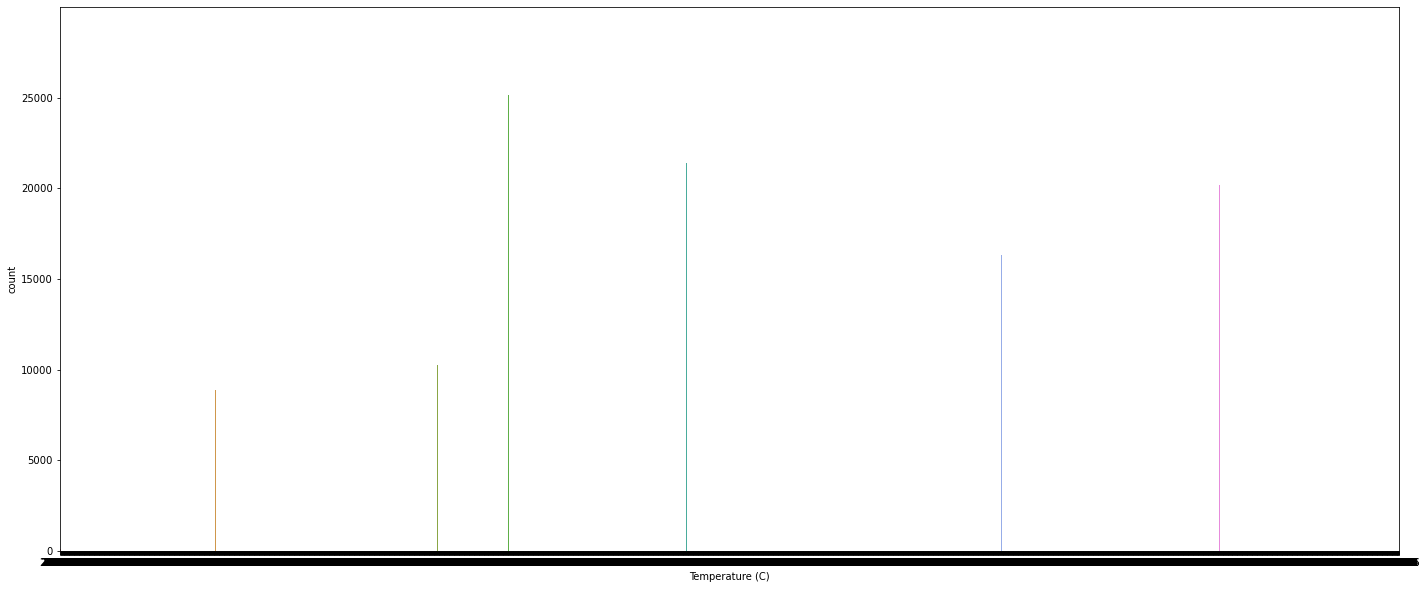

In [ ]:
plt.figure(figsize=(24,10))
sns.countplot(x='Temperature (C)',data=df)

In [ ]:
df['Temperature (C)'].value_counts(bins = 6)

(26.403, 26.94]     182818
(25.866, 26.403]    112900
(23.714, 24.255]         1
(24.255, 24.792]         0
(24.792, 25.329]         0
(25.329, 25.866]         0
Name: Temperature (C), dtype: int64

In [ ]:
sorted_t = df["Temperature (C)"].value_counts(ascending=False)

In [59]:
#the only out of range record (based on the temperature value is first record) which is removed
df_1 = df.drop(df.index[0])

<AxesSubplot:xlabel='Temperature (C)', ylabel='count'>

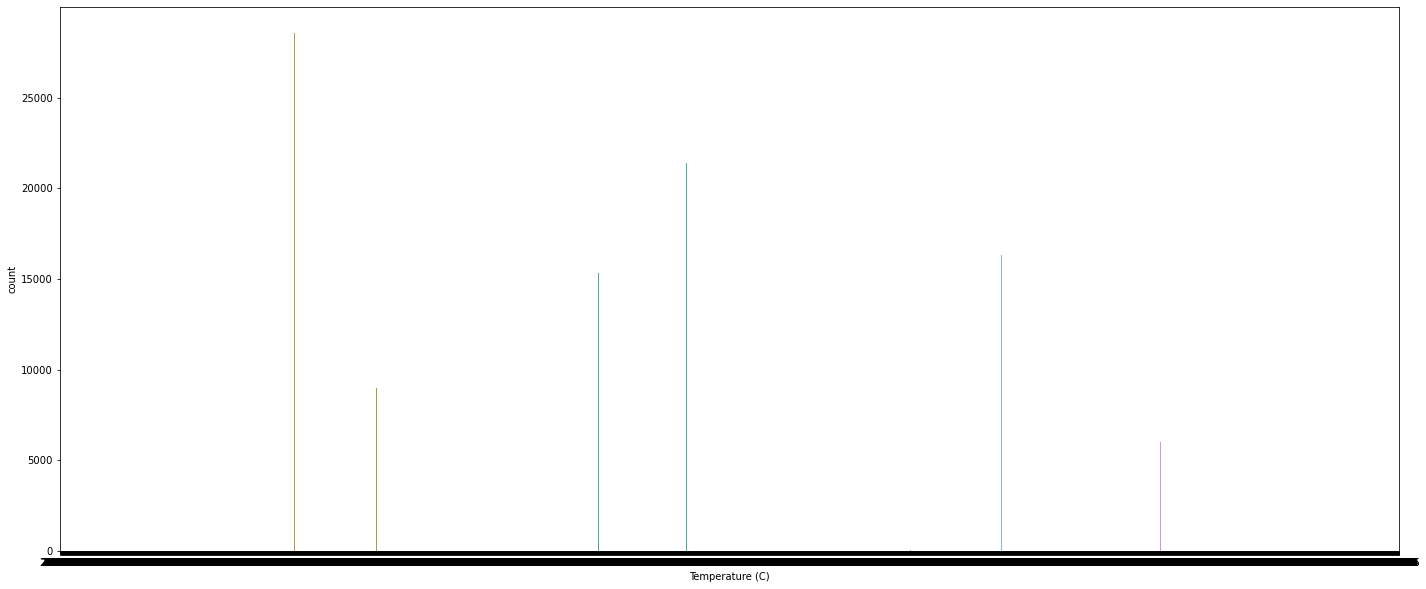

In [ ]:
plt.figure(figsize=(24,10))
sns.countplot(x='Temperature (C)',data=df_1)

In [ ]:
df_1['Temperature (C)'].value_counts(bins = 6)

(26.353, 26.5]      78117
(26.5, 26.647]      62603
(26.207, 26.353]    55331
(26.647, 26.793]    50558
(26.058, 26.207]    31360
(26.793, 26.94]     17749
Name: Temperature (C), dtype: int64

In [ ]:
df_1['Temperature (C)'].value_counts(bins = 2)

(26.058, 26.5]    164808
(26.5, 26.94]     130910
Name: Temperature (C), dtype: int64

In [ ]:
#count plot shows 6 discrete temperature values with most frequency
#however 6 classes based on them would be unbalanced.
#by changing the number of bins in counting the frequency of tempretaure values
#it is seen in both cases (including and excluding first record), two almost balanced classes
#can be created:
#(26.058, 26.5]    164808
#(26.5, 26.94]     130910
#data in each bin should be set as a class to create finaly two classes.

In [ ]:
maximum = "MAX"
minimum = "MIN"
average = "AVG"

In [ ]:
#classification method 1:
#classify temperature data in three classes (min,avg,max) based on temperature values:
def temp_class(Temperature):
  if Temperature<26.5:
    return 0
  else:
    return 1
df_1['Temperature (C)'] = df_1.apply(lambda x: temp_class(x['Temperature (C)']), axis=1)

In [61]:
df

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295714,90908.545,0.0,62.3000,26.5800,0.0000,0.2000,5.5429,2.5713,10.3815,18.5796,36.4589,34.4549,38.3745,57.5888,45.7953,56.6351,56.4058,50.6129,43.0232,65.2822
295715,90908.853,0.0,62.3000,26.5800,0.0000,0.2000,4.5527,2.1454,8.5494,18.0592,36.6290,34.0052,37.6964,51.9752,45.0239,58.9374,61.6173,50.9361,43.4604,63.8761
295716,90909.162,0.0,62.3000,26.5800,0.0000,0.2000,3.7374,1.8492,7.1062,18.0087,36.0127,32.5056,37.1882,54.4724,45.0239,59.7462,57.1452,51.8182,42.5944,64.3090
295717,90909.469,0.0,62.3000,26.5800,0.0000,0.2000,3.1197,1.6190,5.9138,17.6950,37.5930,30.5253,35.9328,51.9752,45.5201,57.7289,60.3791,50.3466,42.4022,62.0375


In [60]:
df_1

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
1,0.309,0.0,55.84,26.62,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.84,26.62,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.84,26.62,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.84,26.62,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445
5,1.544,0.0,55.84,26.62,240.8361,0.2020,60.1083,74.3444,81.5100,29.7970,72.9643,83.1477,80.5302,58.0412,39.2482,65.0981,67.8697,63.5316,50.3730,63.3641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295714,90908.545,0.0,62.30,26.58,0.0000,0.2000,5.5429,2.5713,10.3815,18.5796,36.4589,34.4549,38.3745,57.5888,45.7953,56.6351,56.4058,50.6129,43.0232,65.2822
295715,90908.853,0.0,62.30,26.58,0.0000,0.2000,4.5527,2.1454,8.5494,18.0592,36.6290,34.0052,37.6964,51.9752,45.0239,58.9374,61.6173,50.9361,43.4604,63.8761
295716,90909.162,0.0,62.30,26.58,0.0000,0.2000,3.7374,1.8492,7.1062,18.0087,36.0127,32.5056,37.1882,54.4724,45.0239,59.7462,57.1452,51.8182,42.5944,64.3090
295717,90909.469,0.0,62.30,26.58,0.0000,0.2000,3.1197,1.6190,5.9138,17.6950,37.5930,30.5253,35.9328,51.9752,45.5201,57.7289,60.3791,50.3466,42.4022,62.0375


In [62]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295718 entries, 1 to 295718
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time (s)            295718 non-null  float64
 1   CO (ppm)            295718 non-null  float64
 2   Humidity (%r.h.)    295718 non-null  float64
 3   Temperature (C)     295718 non-null  float64
 4   Flow rate (mL/min)  295718 non-null  float64
 5   Heater voltage (V)  295718 non-null  float64
 6   R1 (MOhm)           295718 non-null  float64
 7   R2 (MOhm)           295718 non-null  float64
 8   R3 (MOhm)           295718 non-null  float64
 9   R4 (MOhm)           295718 non-null  float64
 10  R5 (MOhm)           295718 non-null  float64
 11  R6 (MOhm)           295718 non-null  float64
 12  R7 (MOhm)           295718 non-null  float64
 13  R8 (MOhm)           295718 non-null  float64
 14  R9 (MOhm)           295718 non-null  float64
 15  R10 (MOhm)          295718 non-nul

<AxesSubplot:xlabel='Temperature (C)', ylabel='count'>

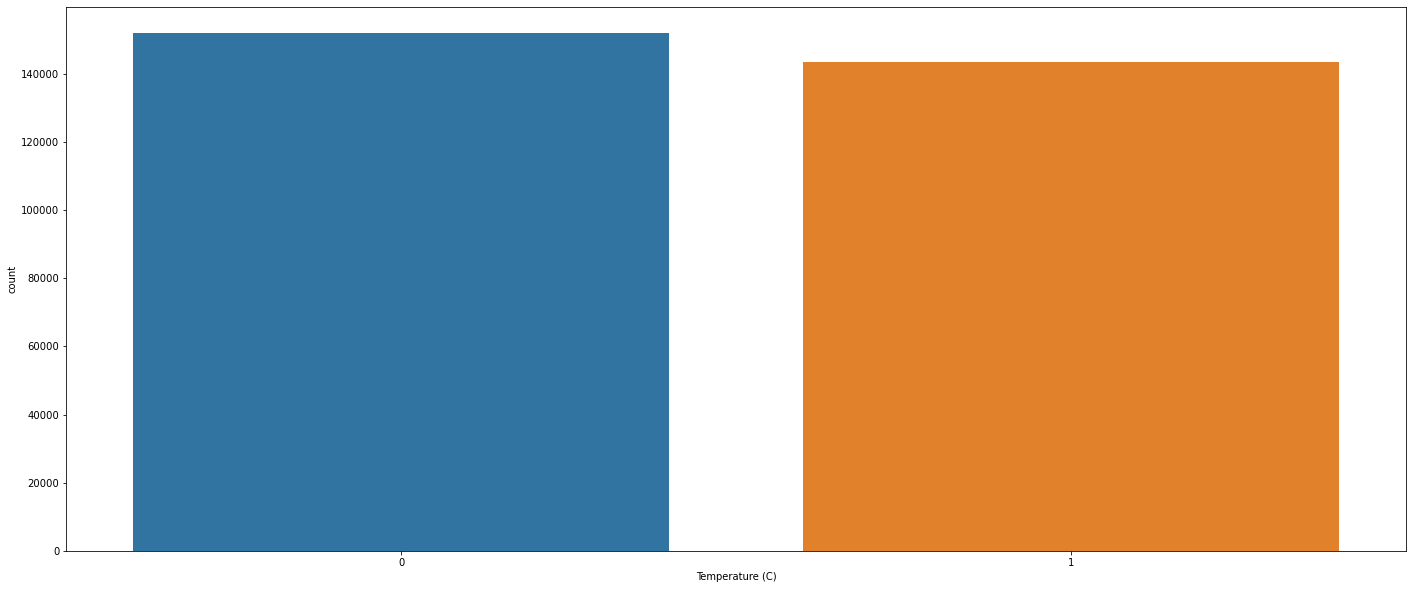

In [ ]:
plt.figure(figsize=(24,10))
sns.countplot(x='Temperature (C)',data=df_1)

In [63]:
#make a correlated data frame:
#finding pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded. For any non-numeric data type columns
#in the dataframe it is ignored.
df_1_corr=df_1.corr()

<Axes: >

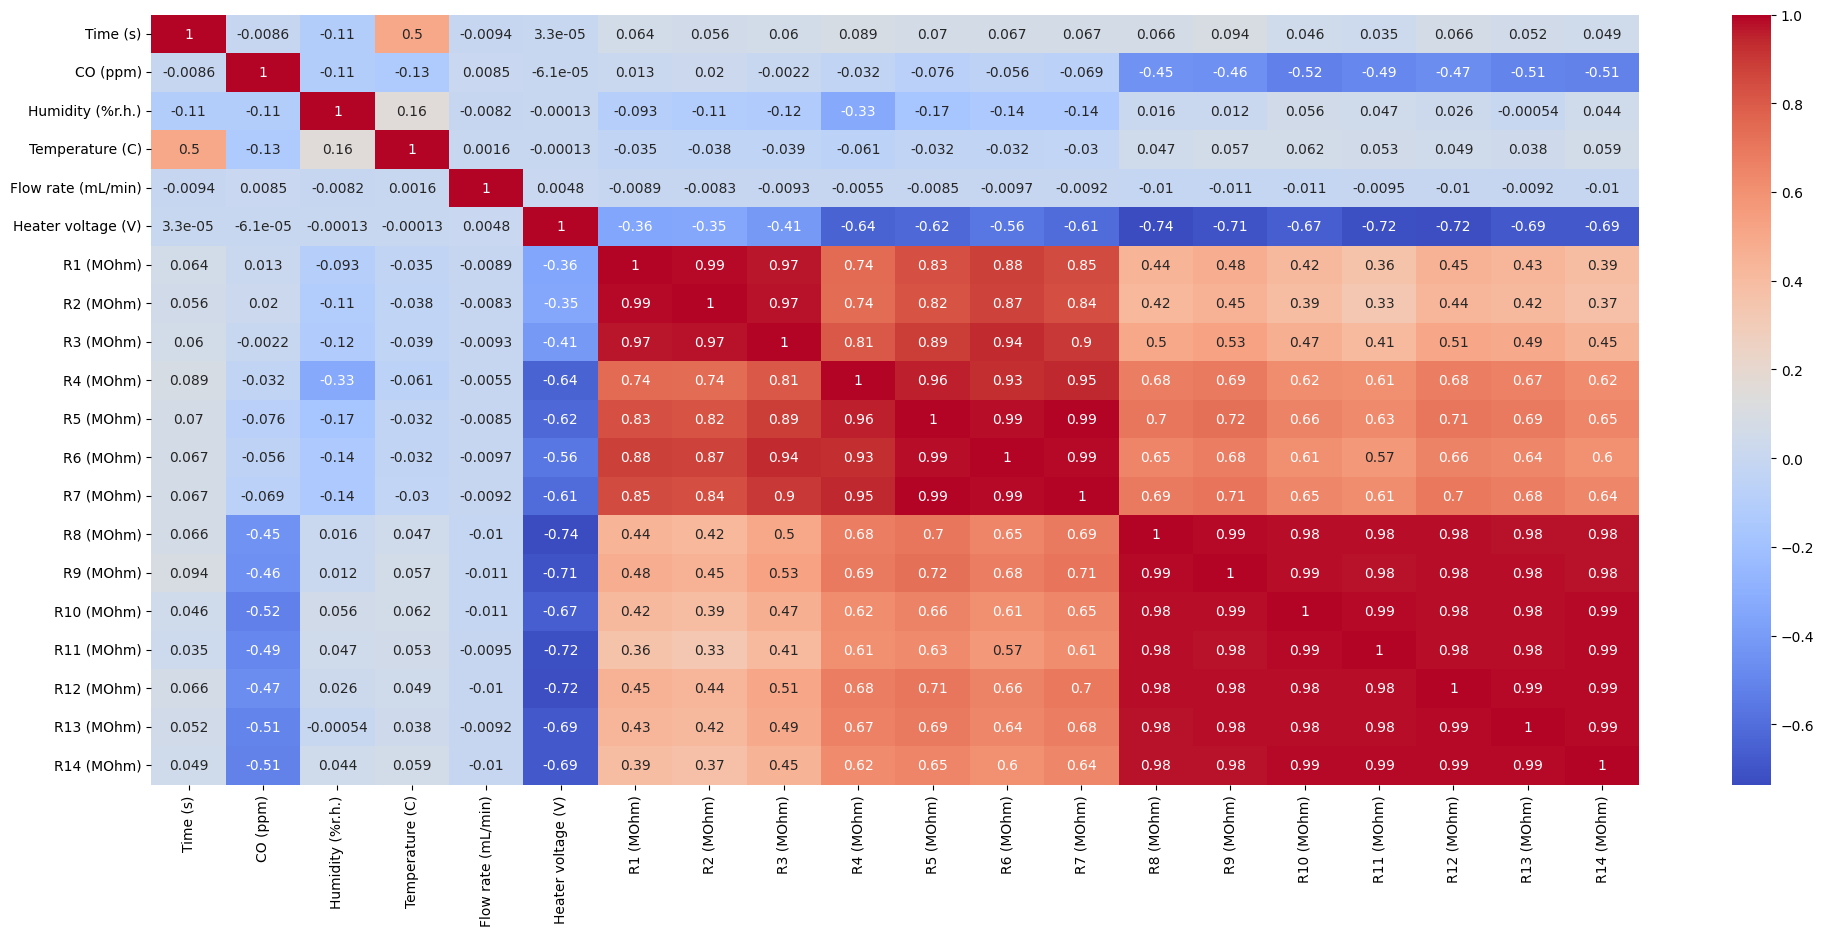

In [64]:
#define the size of the plot:
plt.figure(figsize=(24,10))
#plot heatmap plot of the correlated data frame:
sns.heatmap(df_1_corr,cmap='coolwarm',annot=True)

In [ ]:
#logistic regression:
#import libraries from scikit-learn to split data into train and test sets:
from sklearn.model_selection import train_test_split

In [ ]:
#define object and featues in the data frame:
X = df_1.drop('Temperature (C)',axis=1).values
y = df_1['Temperature (C)'].values

In [ ]:
#split data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#import the model k-nearest neighbors from scikit-learn linrary to perform
#data training and prediction:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#choosing k value (number of neighbers):
# Change to every 5, not 1 to 40. Seems like nonsense to group temperatures like this?
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

KeyboardInterrupt: 

Text(0, 0.5, 'Error Rate')

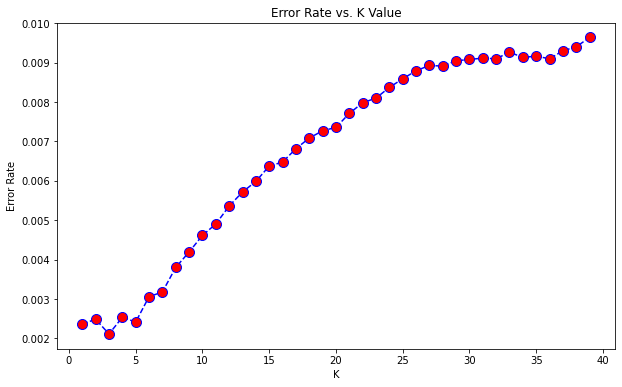

In [ ]:
#plot the error rate as a function of k-value to decide which k-value we are going to use.
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#choosing k value (number of neighbers):
error_rate = []
for i in range(41,80):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

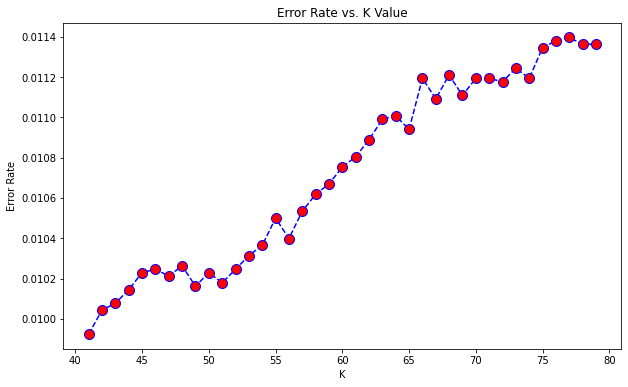

In [ ]:
#plot the error rate as a function of k-value to decide which k-value we are going to use.
plt.figure(figsize=(10,6))
plt.plot(range(41,80),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#choosing k value (number of neighbers):
error_rate = []
for i in range(81,120):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

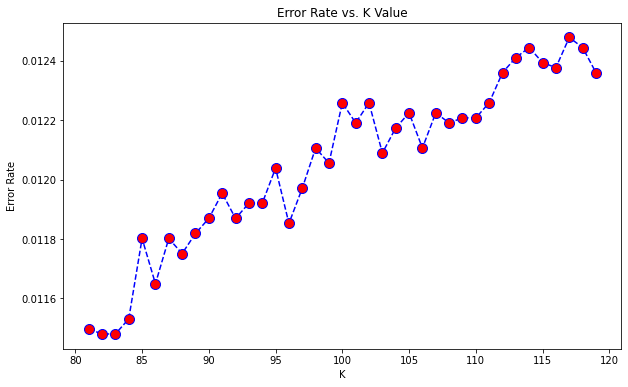

In [ ]:
#plot the error rate as a function of k-value to decide which k-value we are going to use.
plt.figure(figsize=(10,6))
plt.plot(range(81,120),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#choosing k value (number of neighbers):
error_rate = []
for i in range(1,120):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

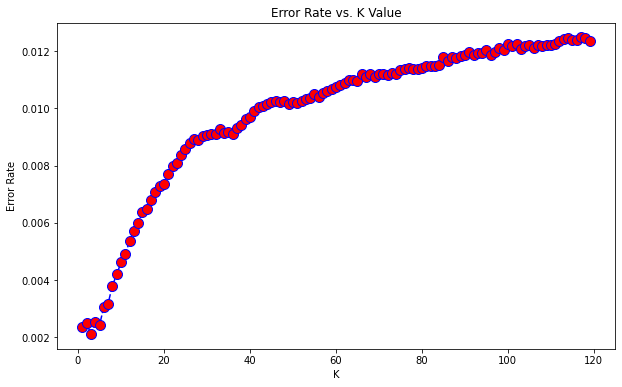

In [ ]:
#plot the error rate as a function of k-value to decide which k-value we are going to use.
plt.figure(figsize=(10,6))
plt.plot(range(1,120),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#%n_neighbors found and should be specified
knn = KNeighborsClassifier(60)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=60)

In [ ]:
predictions = knn.predict(X_test)

In [ ]:
predictions_all = knn.predict(X)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30396
           1       0.99      0.99      0.99     28748

    accuracy                           0.99     59144
   macro avg       0.99      0.99      0.99     59144
weighted avg       0.99      0.99      0.99     59144



In [ ]:
print('confusion matrix:',confusion_matrix(y_test,predictions))

confusion matrix: [[30067   329]
 [  307 28441]]


In [ ]:
print('confusion matrix:',confusion_matrix(y,predictions_all))

confusion matrix: [[150443   1591]
 [  1401 142283]]


In [ ]:
# predict a multinomial probability distribution for a new record
#y_probablity = knn.predict_proba(X_new)

# Essentially 19 time series datasets (time vs other feature)
# treat temperature as outcome
# treat other variables as predictors

# Start with removing trend (stationality) from temperature data
# stl in R, search for python, this function detrends the data
# stationary -> distributions for each time frame similar.
#

# if doing linear regression, noises are anything can;t be explained
# if we assume if noise is independent, can use linear regression

 # Run code first, then do time series approach. -> Need to consider association over time.

 # KNN and logistic regression assumes independence
 # law of large numbers -> mean converges,
 # in linear regression, when noise distribution is normal, so MLE is least squares

 # in time series, we assume noise distribution is normal, use MLE to estimate coeffieicents/ variances. Otherwise if no normal distribution, difficult
 # time series regression model, ic is for model selection (ex: aic)
 # auto.arima in R auto.arima(y, predictors, ic)

 # comapre accuracies to see which model is accurate.

In [ ]:
# summarize the predicted probabilities
#print('Predicted Probabilities: %s' % y_probablity[0])